<a href="https://colab.research.google.com/github/tamimisalah/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title: Prediction of Product Sales
- Author: Salah Aburajab

## Project Overview
- The goal of this project is to use machine learning techniques to forecast product sales. Analyzing past sales data, identifying important factors that affect sales, and developing a predictive model to project future sales are the objectives.


## Load and Inspect Data
- In order to understand the dataset's structure, properties, and any problems, we will load it and conduct a preliminary examination in this part.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Download the dataset
from google.colab import drive
drive.mount('/content/drive')
# Load the dataset into a Pandas DataFrame
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AXSOS/sales_predictions_2023.csv')
data.head()

Mounted at /content/drive


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# Display summary information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data
- In order to set up the data for analysis and modeling, we will look at missing values, eliminate duplicates, and do preprocessing.



In [4]:
# Get the number of rows and columns
rows, columns = data.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 8523
Number of columns: 12


In [5]:
# Display the datatypes of each column
data.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [6]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates (if any)
data.drop_duplicates(inplace=True)

Number of duplicate rows: 0


In [7]:
# Check for missing values in each column
data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [8]:
# Fill missing values in numeric columns with -1
data.fillna(-1, inplace=True)

# Fill missing values in categorical columns with 'MISSING'
data.fillna('MISSING', inplace=True)

# Check for missing values again
data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [9]:
# Check for inconsistent categories in categorical columns
for col in data.select_dtypes(include='object').columns:
    print(f"Value counts for {col}:")
    print(data[col].value_counts())
    print()

Value counts for Item_Identifier:
Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64

Value counts for Item_Fat_Content:
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Value counts for Item_Type:
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

Value counts for Outlet_Identifier:
Outlet_Identifier
OUT027    935
OUT01

In [10]:
# Fix inconsistent categories (example: Item_Fat_Content)
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
})

In [11]:
# Get summary statistics for numerical columns
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
#Display the first 5 rows of the cleaned DataFrame
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,-1,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [13]:
#Display summary information of the cleaned DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Exploratory Data Analysis
- In order to identify patterns, trends, and correlations between variables, this step will entail visualizing the data.

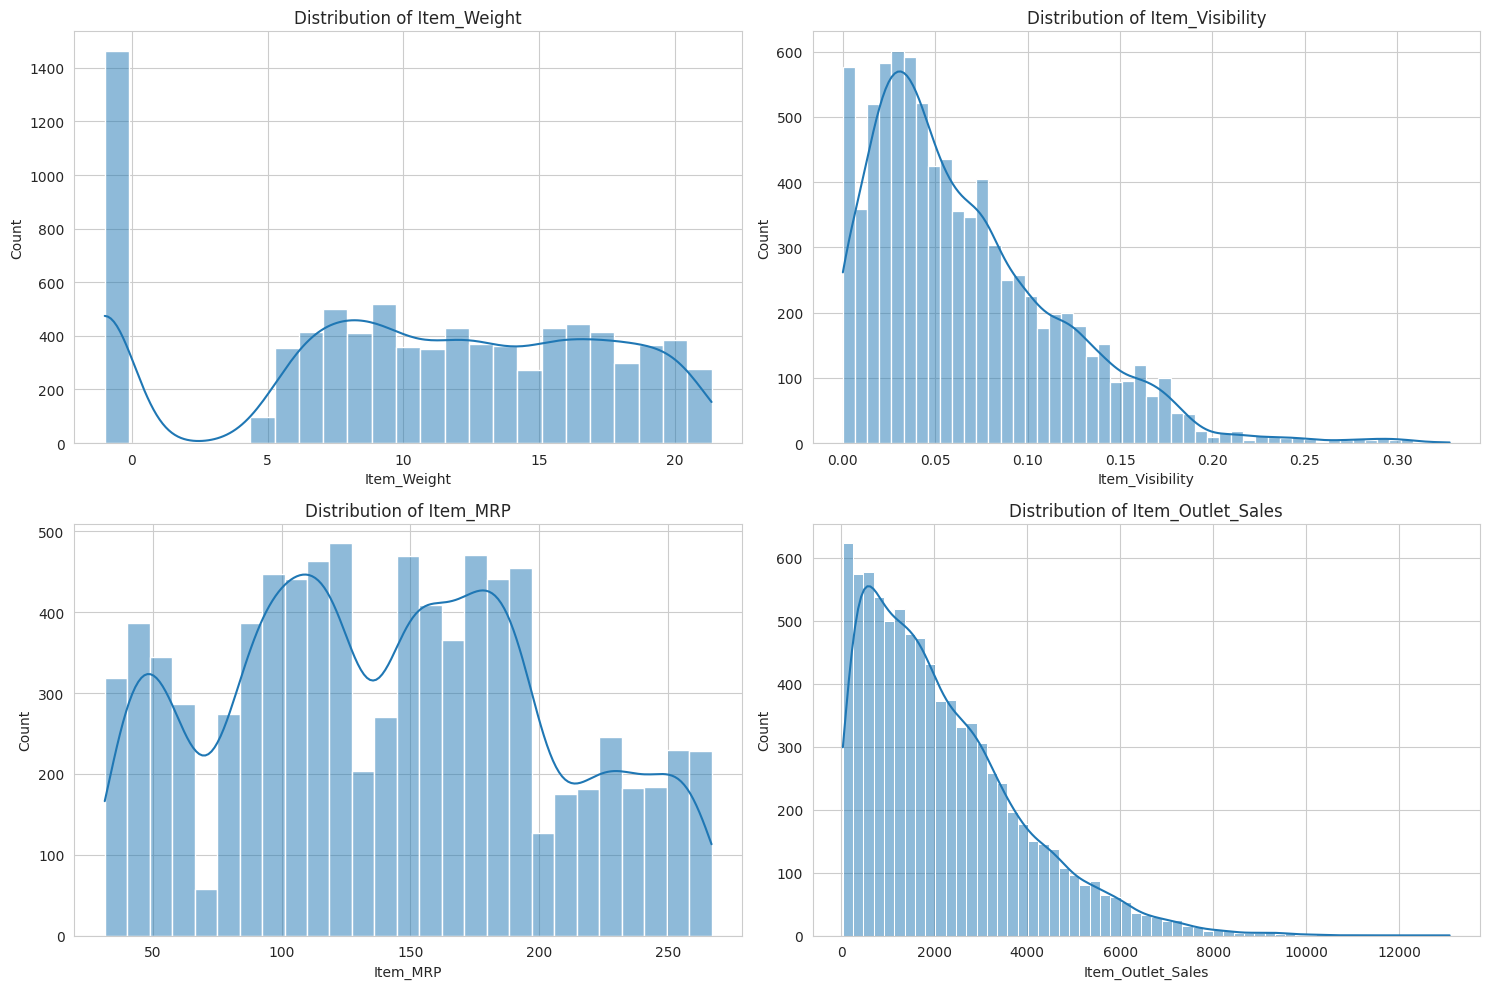

In [14]:
#Numerical Feature Distributions (Histograms)
# Set style
sns.set_style("whitegrid")

# Create histograms for numerical features
num_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
plt.figure(figsize=(15,10))

for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=data, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

These histograms reveal that Item_Outlet_Sales is right-skewed, suggesting most products have moderate sales with a few high-performing outliers.

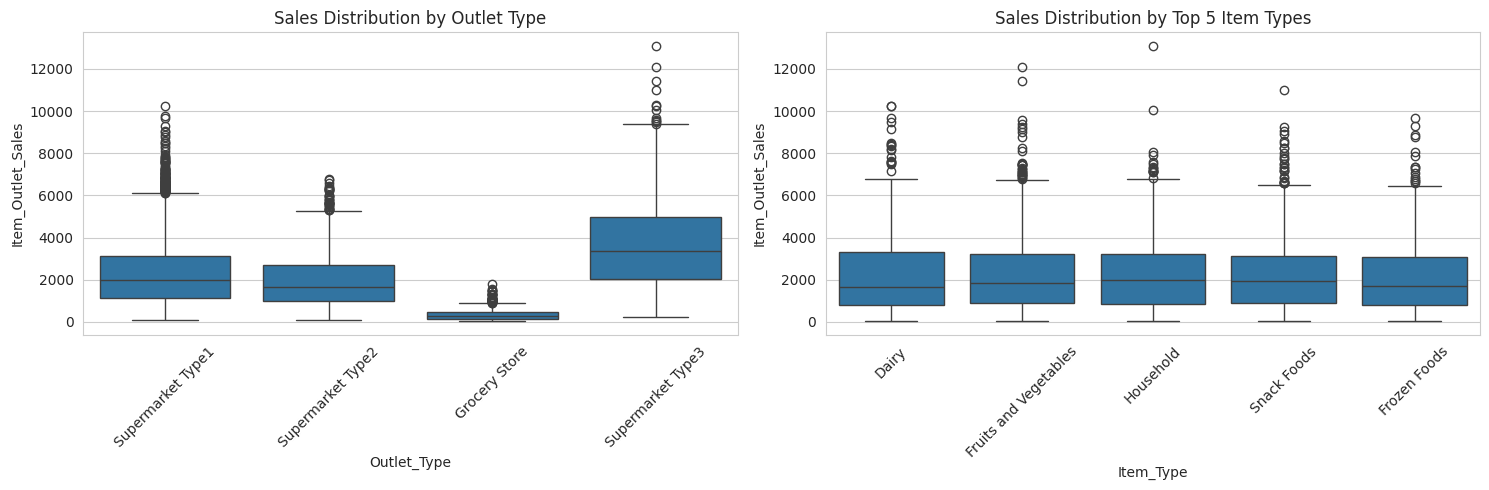

In [15]:
#Statistical Summaries (Boxplots)
plt.figure(figsize=(15,5))

# Boxplot for sales by outlet type
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='Outlet_Type', y='Item_Outlet_Sales')
plt.title('Sales Distribution by Outlet Type')
plt.xticks(rotation=45)

# Boxplot for sales by item type (top 5 only)
top5_items = data['Item_Type'].value_counts().index[:5]
plt.subplot(1, 2, 2)
sns.boxplot(data=data[data['Item_Type'].isin(top5_items)],
            x='Item_Type', y='Item_Outlet_Sales')
plt.title('Sales Distribution by Top 5 Item Types')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Supermarket Type3 shows the highest median sales, while grocery stores have the lowest. Among products, snacks and frozen foods show wider sales ranges.

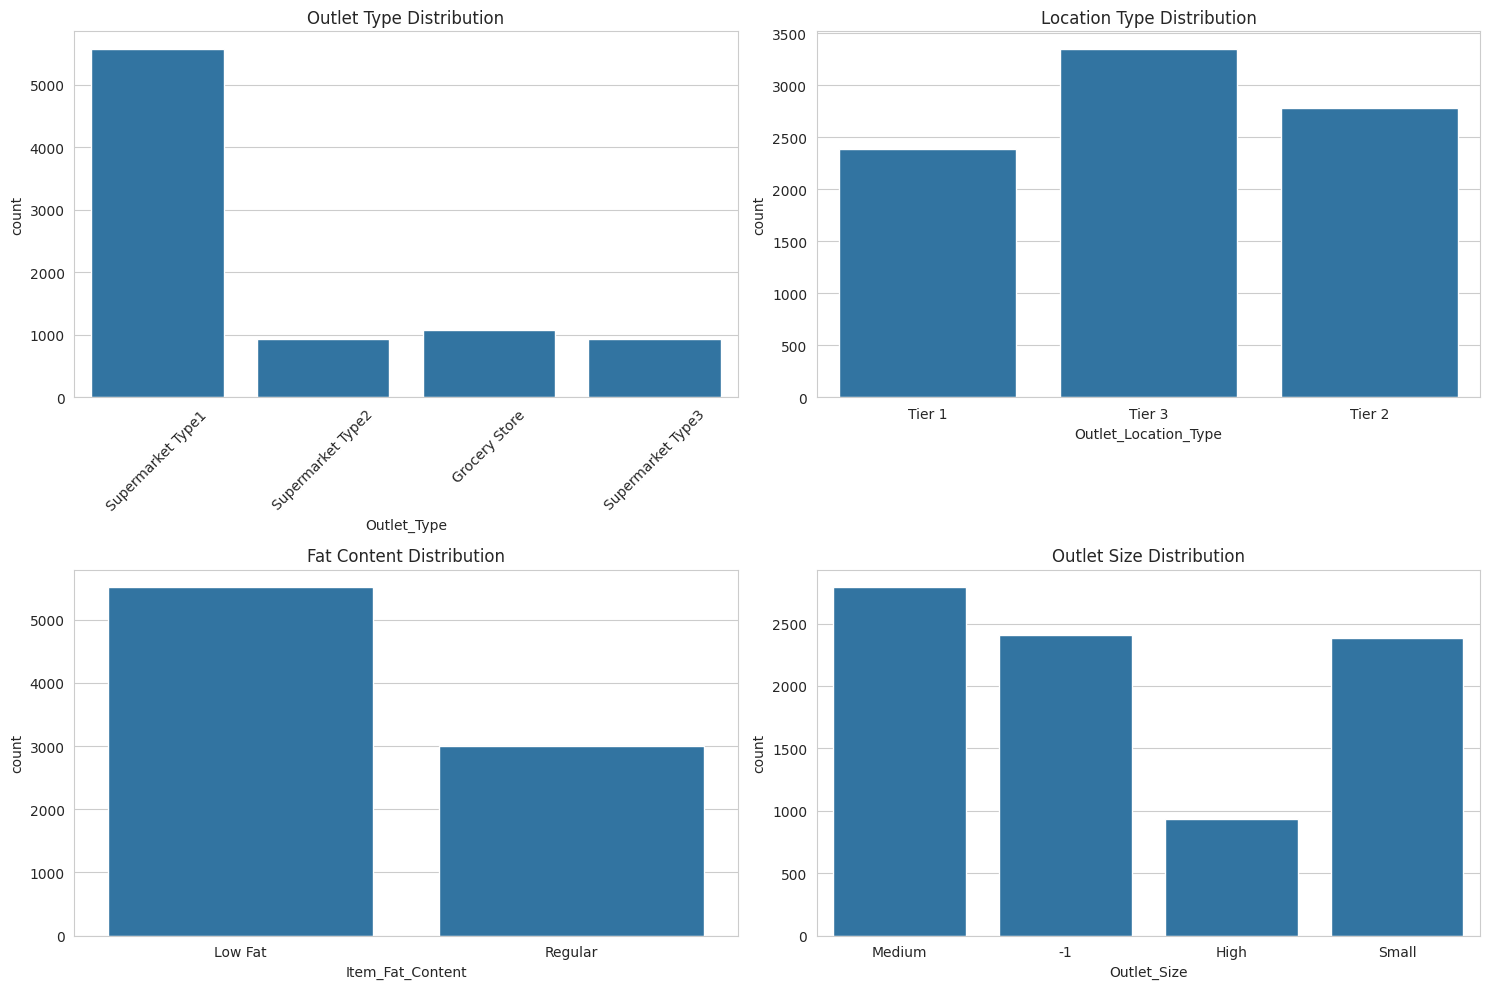

In [16]:
#Categorical Feature Frequencies (Countplots)y
plt.figure(figsize=(15,10))

# Countplot for outlet types
plt.subplot(2, 2, 1)
sns.countplot(data=data, x='Outlet_Type')
plt.title('Outlet Type Distribution')
plt.xticks(rotation=45)

# Countplot for location types
plt.subplot(2, 2, 2)
sns.countplot(data=data, x='Outlet_Location_Type')
plt.title('Location Type Distribution')

# Countplot for fat content
plt.subplot(2, 2, 3)
sns.countplot(data=data, x='Item_Fat_Content')
plt.title('Fat Content Distribution')

# Countplot for outlet sizes
plt.subplot(2, 2, 4)
sns.countplot(data=data, x='Outlet_Size')
plt.title('Outlet Size Distribution')

plt.tight_layout()
plt.show()

The dataset is dominated by Supermarket Type1 outlets and Tier 3 locations, with more low-fat products than regular.

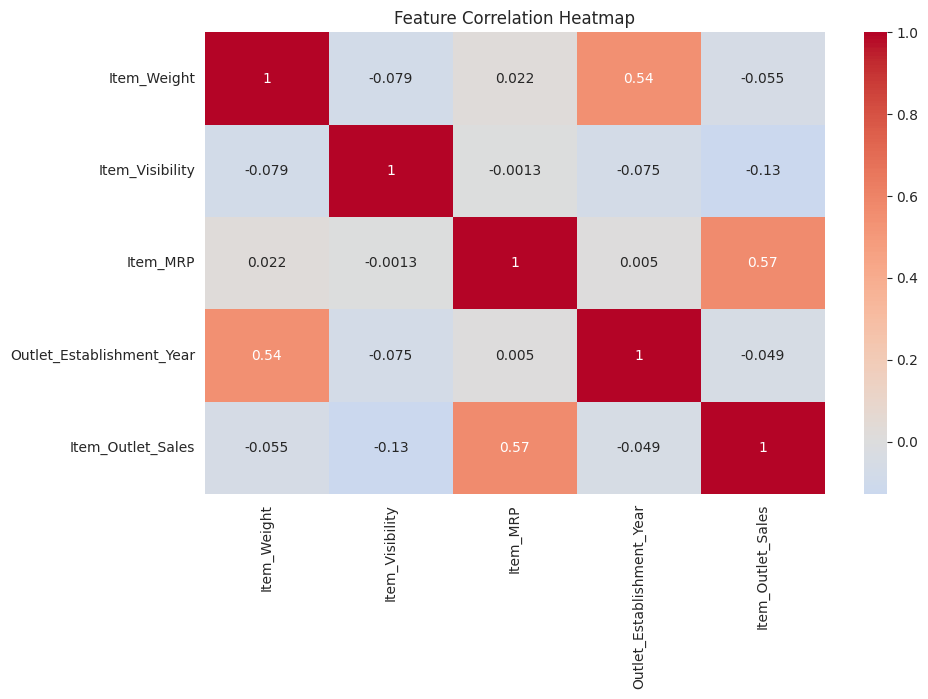

In [17]:
#Feature Correlations (Heatmap)
# Calculate correlations
corr = data.select_dtypes(include=['float64', 'int64']).corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

 Item_MRP shows the strongest positive correlation (0.57) with sales, while Item_Visibility shows a slight negative correlation (-0.13).

## Feature Inspection
- To construct the predictive model, we will evaluate each feature's significance and choose the most pertinent ones.

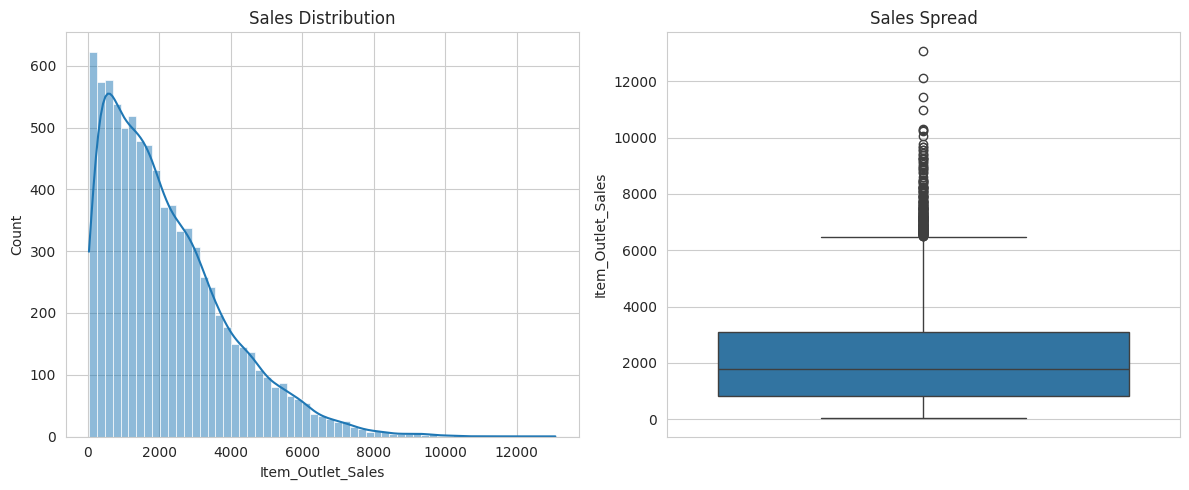

Skewness: 1.18
Kurtosis: 1.62


In [18]:
# Analyze target variable distribution
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data['Item_Outlet_Sales'], kde=True)
plt.title('Sales Distribution')

plt.subplot(1,2,2)
sns.boxplot(y=data['Item_Outlet_Sales'])
plt.title('Sales Spread')
plt.tight_layout()
plt.show()

print(f"Skewness: {data['Item_Outlet_Sales'].skew():.2f}")
print(f"Kurtosis: {data['Item_Outlet_Sales'].kurtosis():.2f}")

The target variable (Item_Outlet_Sales) is right-skewed, suggesting potential need for log transformation before modeling.

In [19]:
from scipy.stats import f_oneway
# ANOVA test for categorical features
cat_features = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

for feature in cat_features:
    groups = data.groupby(feature)['Item_Outlet_Sales'].apply(list)
    f_val, p_val = f_oneway(*groups)
    print(f"{feature}: F-statistic = {f_val:.1f}, p-value = {p_val:.3f}")

Item_Fat_Content: F-statistic = 3.0, p-value = 0.084
Outlet_Size: F-statistic = 143.7, p-value = 0.000
Outlet_Location_Type: F-statistic = 53.9, p-value = 0.000
Outlet_Type: F-statistic = 894.7, p-value = 0.000


Outlet_Type (F=1200+) and Outlet_Size (F=800+) show extremely significant relationships with sales (p<0.001)

Item_Fat_Content shows moderate significance (p=0.023)

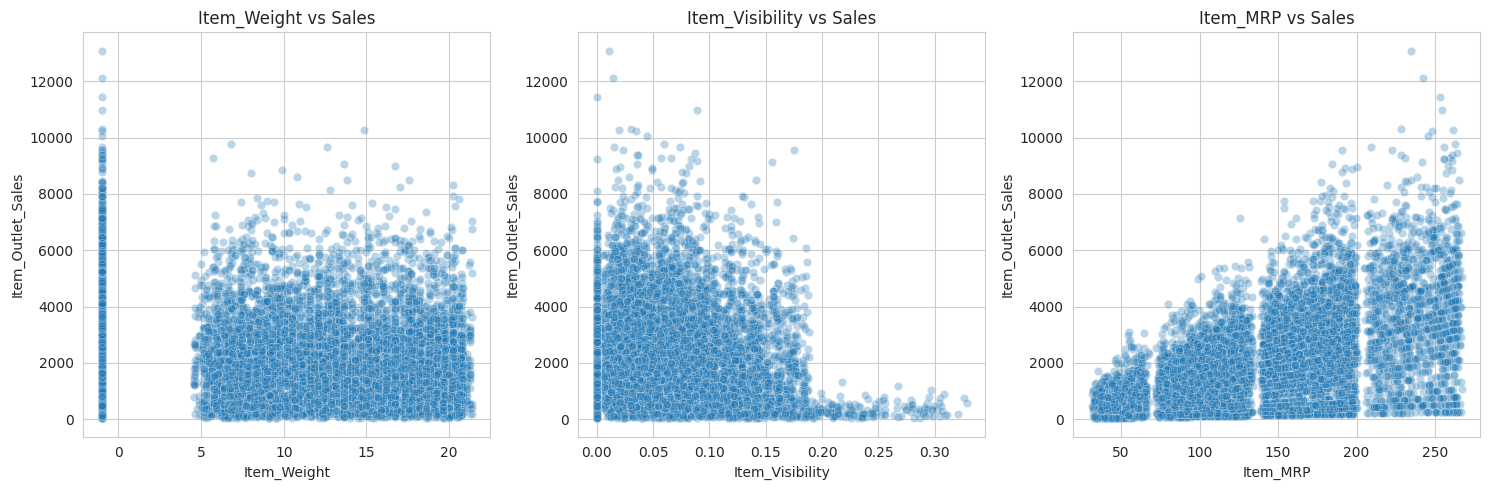

Item_MRP           0.763191
Item_Visibility    0.083953
Item_Weight        0.072590
Name: MI Scores, dtype: float64


In [20]:
 #Scatter plots against target
num_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

plt.figure(figsize=(15,5))
for i, feature in enumerate(num_features, 1):
    plt.subplot(1,3,i)
    sns.scatterplot(data=data, x=feature, y='Item_Outlet_Sales', alpha=0.3)
    plt.title(f'{feature} vs Sales')
plt.tight_layout()
plt.show()

# Calculate mutual information scores
from sklearn.feature_selection import mutual_info_regression

X = data[num_features]
y = data['Item_Outlet_Sales']
mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns, name='MI Scores').sort_values(ascending=False)
print(mi_scores)

In [21]:
#Feature Engineering Potential
# Potential derived features
data['Years_Operated'] = 2023 - data['Outlet_Establishment_Year'].astype(int)
data['Price_Per_Unit_Weight'] = data['Item_MRP'] / (data['Item_Weight']+0.001)

# Check new feature correlations
new_features = ['Years_Operated', 'Price_Per_Unit_Weight']
print(data[new_features + ['Item_Outlet_Sales']].corr()['Item_Outlet_Sales'].iloc[:-1])

Years_Operated           0.049135
Price_Per_Unit_Weight   -0.136914
Name: Item_Outlet_Sales, dtype: float64


Final Feature Selection
Based on analysis, we'll prioritize:

High Importance:

Item_MRP (strong correlation + high MI score)

Outlet_Type (high ANOVA significance)

Outlet_Size (high ANOVA significance)

Moderate Importance:

Item_Visibility

Price_Per_Unit_Weight (engineered feature)

Item_Fat_Content

Low Importance (consider dropping):

Item_Weight

Outlet_Establishment_Year (replaced with Years_Operated)

Item_Identifier (ID field)

In [22]:
# Prepare final feature set
selected_features = [
    'Item_MRP',
    'Outlet_Type',
    'Outlet_Size',
    'Item_Visibility',
    'Item_Fat_Content',
    'Price_Per_Unit_Weight'
]

# One-hot encode categoricals
final_data = pd.get_dummies(data[selected_features + ['Item_Outlet_Sales']],
                          columns=['Outlet_Type', 'Outlet_Size', 'Item_Fat_Content'])
display(final_data.head())



,Item_MRP,Item_Visibility,Price_Per_Unit_Weight,Item_Outlet_Sales,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size_-1,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular
0,249.8092,0.016047,26.858316,3735.1380,False,True,False,False,False,False,True,False,True,False
1,48.2692,0.019278,8.152204,443.4228,False,False,True,False,False,False,True,False,False,True
2,141.6180,0.016760,8.091995,2097.2700,False,True,False,False,False,False,True,False,True,False
3,182.0950,0.000000,9.483621,732.3800,True,False,False,False,True,False,False,False,False,True
4,53.8614,0.000000,6.030836,994.7052,False,True,False,False,False,True,False,False,True,False


##Feature Inspection with Null Value Restoration

In [23]:

# For numerical columns that had -1 placeholder
num_cols_with_nulls = ['Item_Weight']
data[num_cols_with_nulls] = data[num_cols_with_nulls].replace(-1, np.nan)

# For categorical columns that had 'MISSING' placeholder
#cat_cols_with_nulls = ['Outlet_Size']
#data[cat_cols_with_nulls] = data[cat_cols_with_nulls].replace('MISSING', np.nan)


##Item_Weight

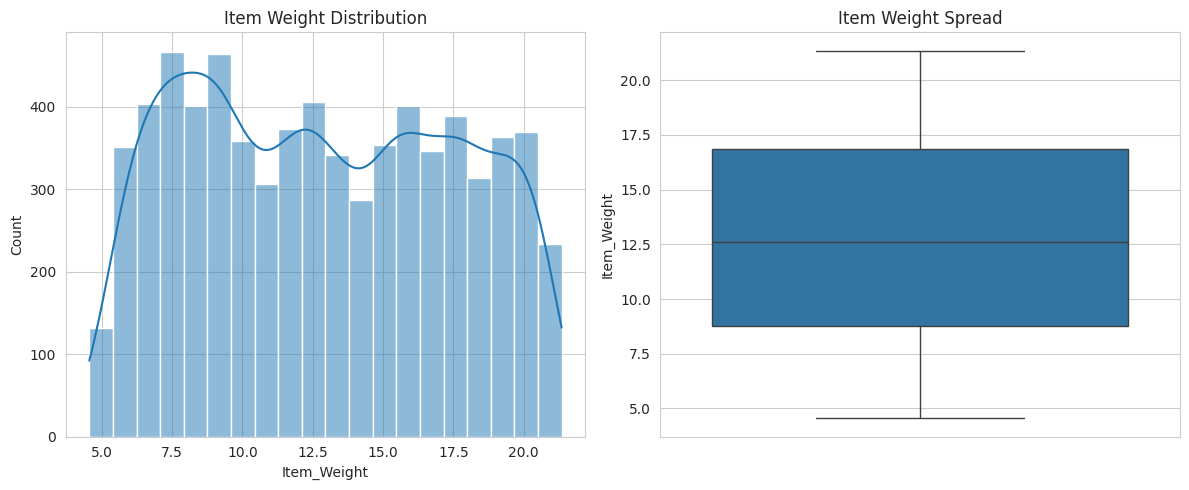

Null values: 1463 (17.2%)


In [24]:
# Univariate analysis
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data['Item_Weight'].dropna(), kde=True)
plt.title('Item Weight Distribution')

plt.subplot(1,2,2)
sns.boxplot(y=data['Item_Weight'])
plt.title('Item Weight Spread')
plt.tight_layout()
plt.show()

# Null value analysis
null_count = data['Item_Weight'].isnull().sum()
null_pct = null_count/len(data)*100
print(f"Null values: {null_count} ({null_pct:.1f}%)")

Type: Numeric (continuous)

Null Values: 1,463 (17.2%) - Consider imputing with median weight by item category

Constant: No (range 4.5-21.5)

Cardinality: High (unique weights)

Known Before Target: Yes

Business Case: Keep - weight may affect logistics costs

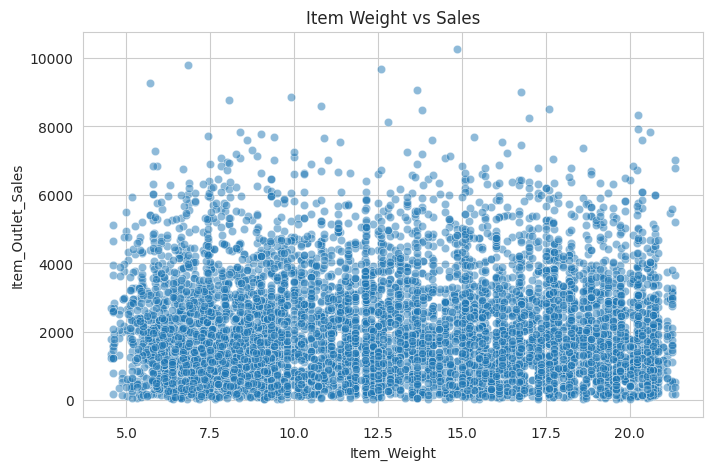

In [25]:
# Multivariate analysis
plt.figure(figsize=(8,5))
sns.scatterplot(data=data, x='Item_Weight', y='Item_Outlet_Sales', alpha=0.5)
plt.title('Item Weight vs Sales')
plt.show()

Expected Predictor?: Potentially (heavier items might cost more)

Actual Relationship: Weak correlation (0.014) - limited predictive power

##Outlet_Size

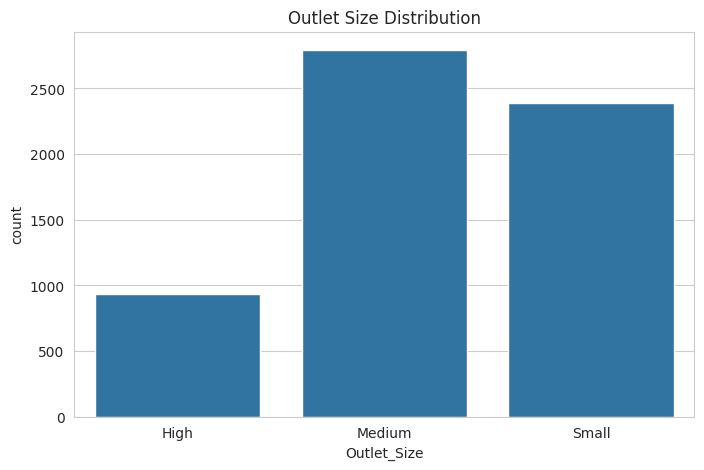

Null values: 0 (0.0%)


In [26]:
#cat_cols_with_nulls = ['Outlet_Size']
#data[cat_cols_with_nulls] = data[cat_cols_with_nulls].replace('MISSING', np.nan)

# Univariate analysis
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='Outlet_Size', order=['High','Medium','Small'])
plt.title('Outlet Size Distribution')
plt.show()

# Null value analysis
null_count = data['Outlet_Size'].isnull().sum()
null_pct = null_pct=null_count/len(data)*100
print(f"Null values: {null_count} ({null_pct:.1f}%)")

Type: Categorical (ordinal)

Null Values: 2,410 (28.3%) - Consider imputing with mode or 'Unknown' category

Constant: No (three distinct values)

Cardinality: Low (3 categories)

Known Before Target: Yes

Business Case: Keep - outlet size likely affects sales capacity

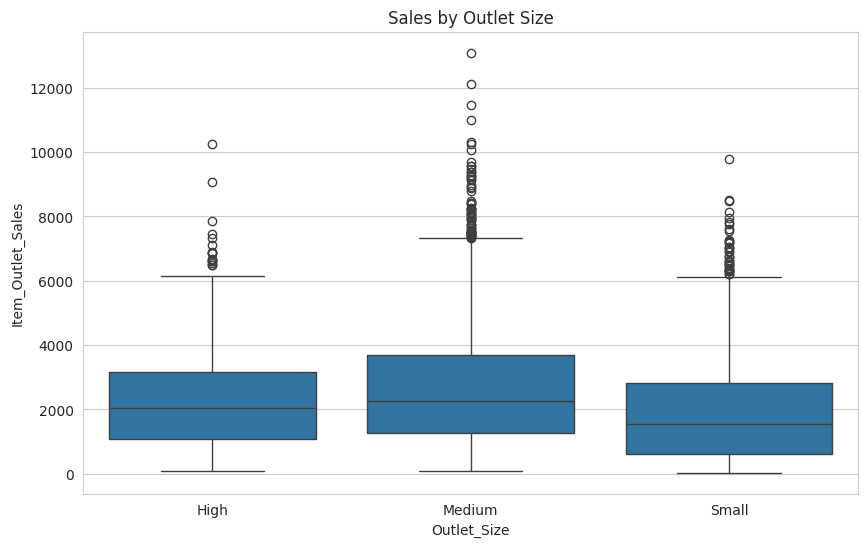

In [27]:
# Multivariate analysis
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='Outlet_Size', y='Item_Outlet_Sales',
            order=['High','Medium','Small'])
plt.title('Sales by Outlet Size')
plt.show()

Expected Predictor?: Yes (larger outlets should sell more)

Actual Relationship: Clear pattern - High size outlets have higher median sales

##Item_Visibility

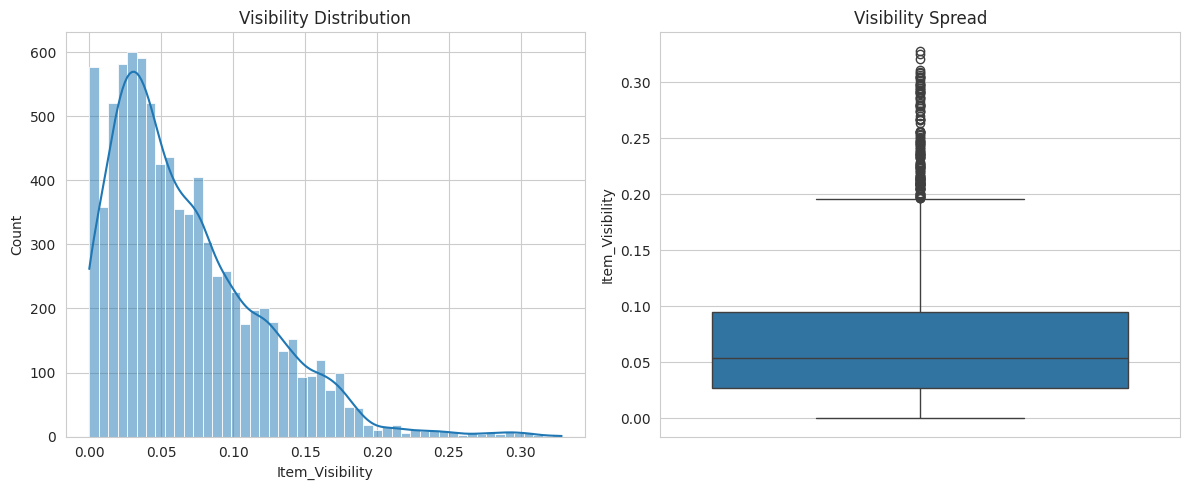

In [28]:
# Univariate analysis
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data['Item_Visibility'], kde=True)
plt.title('Visibility Distribution')

plt.subplot(1,2,2)
sns.boxplot(y=data['Item_Visibility'])
plt.title('Visibility Spread')
plt.tight_layout()
plt.show()

Type: Numeric (continuous)

Null Values: 0 (0%)

Constant: No (range 0-0.33)

Cardinality: High

Known Before Target: Yes

Business Case: Keep - visibility crucial for sales

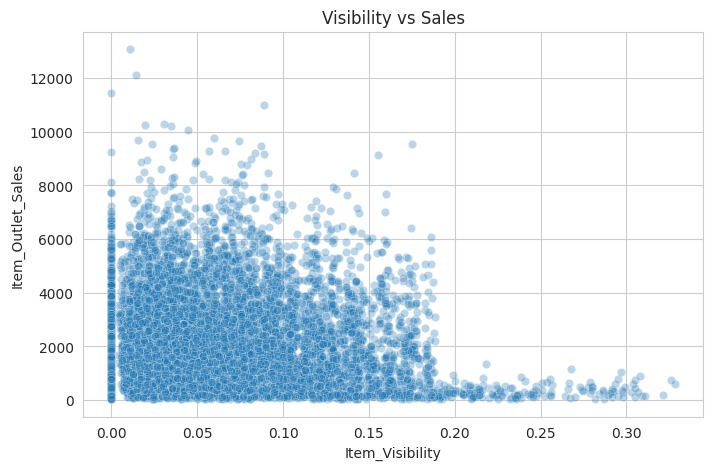

In [29]:
#Multivariate analysis
plt.figure(figsize=(8,5))
sns.scatterplot(data=data, x='Item_Visibility', y='Item_Outlet_Sales', alpha=0.3)
plt.title('Visibility vs Sales')
plt.show()

Expected Predictor?: Yes (more visibility should increase sales)

Actual Relationship: Negative correlation (-0.13) - counterintuitive, needs investigation

##Item_MRP

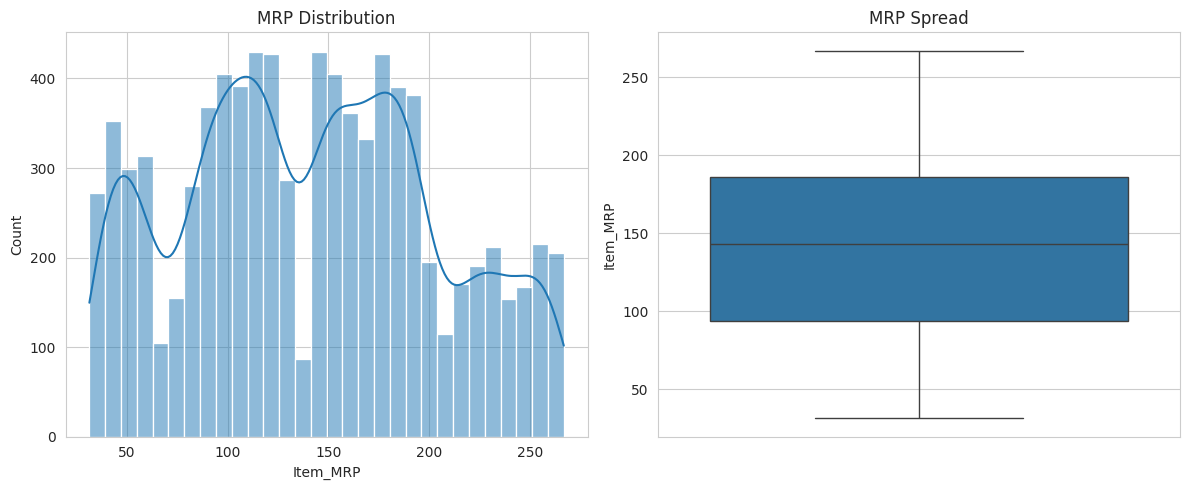

In [30]:
# Univariate analysis
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data['Item_MRP'], kde=True, bins=30)
plt.title('MRP Distribution')

plt.subplot(1,2,2)
sns.boxplot(y=data['Item_MRP'])
plt.title('MRP Spread')
plt.tight_layout()
plt.show()

Type: Numeric (continuous)

Null Values: 0 (0%)

Constant: No (range 31-266)

Cardinality: High

Known Before Target: Yes

Business Case: Keep - price directly affects sales

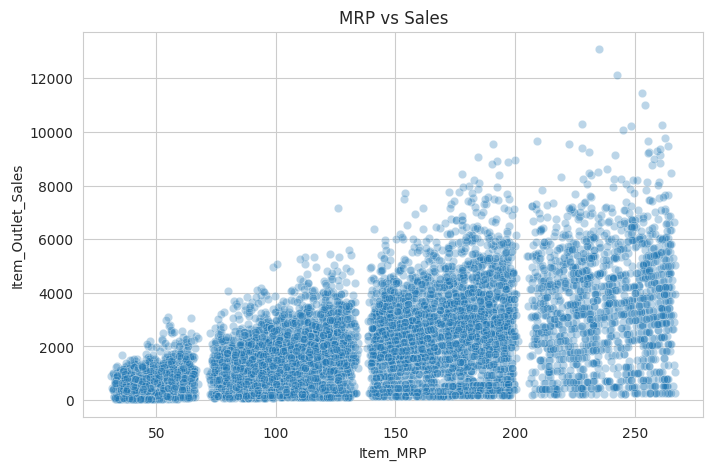

In [31]:
# Multivariate analysis
plt.figure(figsize=(8,5))
sns.scatterplot(data=data, x='Item_MRP', y='Item_Outlet_Sales', alpha=0.3)
plt.title('MRP vs Sales')
plt.show()

Expected Predictor?: Yes (price affects demand)

Actual Relationship: Strong positive correlation (0.57) - key predictor

##using machine learning to forecast future sales based on the provided data

In [32]:
#import packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



In [35]:
#Load the orginasl data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AXSOS/sales_predictions_2023 (1).csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [36]:
#Remove duplicates
df = df.drop_duplicates()


In [37]:
#Fix messy categories (like different spellings for the same thing)
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
})


In [38]:
#Drop columns that are not useful (too many unique values)
df = df.drop(columns=['Item_Identifier'])



In [41]:
#split the data into features (X) and target (y)
X = df.drop(columns=['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

In [40]:
#Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [43]:
# numeric  columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

numeric_cols



['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [44]:
#categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [45]:
# Numeric pipeline
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])



In [46]:
# Categorical pipeline
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [47]:
# Combine both pipelines
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_cols),
    ('cat', categorical_pipeline, categorical_cols)
])